In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

#temp_lines = csv_file.readline() + '\n' + csv_file.readline()
#dialect = csv.Sniffer().sniff(temp_lines, delimiters=';,')

mark_rep = pd.read_csv(r'MarketingReportCoreCSV.csv', sep='delimiter', header=None)


<ipython-input-2-dc20c24b9894>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  mark_rep = pd.read_csv(r'MarketingReportCoreCSV.csv', sep='delimiter', header=None)


In [3]:
mark_rep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8836 entries, 0 to 8835
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       8836 non-null   object
dtypes: object(1)
memory usage: 69.2+ KB


In [4]:
mark_rep.head()

,0
0,periodCode;reportGranularity;salesChannel;plat...
1,20200102;Daily;online;Not tracked;notset;;0;0;...
2,20200103;Daily;online;Not tracked;notset;;0;0;...
3,20200104;Daily;online;Not tracked;notset;;0;0;...
4,20200105;Daily;online;Not tracked;notset;;0;0;...


In [5]:
data = pd.read_csv('MarketingReportCoreCSV.csv', sep = ';', engine='python')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8835 entries, 0 to 8834
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   periodCode               8835 non-null   int64 
 1   reportGranularity        8835 non-null   object
 2   salesChannel             8835 non-null   object
 3   platformCode             8835 non-null   object
 4   channelCode              8835 non-null   object
 5   tagCodes                 81 non-null     object
 6   marketingInvestment      8835 non-null   object
 7   impressions              8835 non-null   int64 
 8   clicks                   8835 non-null   int64 
 9   visits                   8835 non-null   int64 
 10  conversions              8835 non-null   int64 
 11  deliveries               8835 non-null   int64 
 12  currencyCode             8835 non-null   object
 13  appliedAttributionModel  8835 non-null   object
 14  periodStartDate          8835 non-null  

In [7]:
data.head()

,periodCode,reportGranularity,salesChannel,platformCode,channelCode,tagCodes,marketingInvestment,impressions,clicks,visits,conversions,deliveries,currencyCode,appliedAttributionModel,periodStartDate
0,20200102,Daily,online,Not tracked,notset,NaN,0,0,0,0,16,14,CZK,lastTouch,2020-01-02T00:00:00.0000000
1,20200103,Daily,online,Not tracked,notset,NaN,0,0,0,0,13,13,CZK,lastTouch,2020-01-03T00:00:00.0000000
2,20200104,Daily,online,Not tracked,notset,NaN,0,0,0,0,6,6,CZK,lastTouch,2020-01-04T00:00:00.0000000
3,20200105,Daily,online,Not tracked,notset,NaN,0,0,0,0,1,1,CZK,lastTouch,2020-01-05T00:00:00.0000000
4,20200105,Daily,online,Not tracked,notset,NaN,0,0,0,0,9,9,CZK,lastTouch,2020-01-05T00:00:00.0000000


In [8]:
data['tagCodes'].unique()

array([nan, 'fixed'], dtype=object)

In [9]:
data['tagCodes'] = data['tagCodes'].fillna('unknown')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8835 entries, 0 to 8834
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   periodCode               8835 non-null   int64 
 1   reportGranularity        8835 non-null   object
 2   salesChannel             8835 non-null   object
 3   platformCode             8835 non-null   object
 4   channelCode              8835 non-null   object
 5   tagCodes                 8835 non-null   object
 6   marketingInvestment      8835 non-null   object
 7   impressions              8835 non-null   int64 
 8   clicks                   8835 non-null   int64 
 9   visits                   8835 non-null   int64 
 10  conversions              8835 non-null   int64 
 11  deliveries               8835 non-null   int64 
 12  currencyCode             8835 non-null   object
 13  appliedAttributionModel  8835 non-null   object
 14  periodStartDate          8835 non-null  

In [11]:
# Converting period code to dateTime

#data['periodCode'] = pd.to_datetime(data['periodCode'])

In [12]:
data.head()

,periodCode,reportGranularity,salesChannel,platformCode,channelCode,tagCodes,marketingInvestment,impressions,clicks,visits,conversions,deliveries,currencyCode,appliedAttributionModel,periodStartDate
0,20200102,Daily,online,Not tracked,notset,unknown,0,0,0,0,16,14,CZK,lastTouch,2020-01-02T00:00:00.0000000
1,20200103,Daily,online,Not tracked,notset,unknown,0,0,0,0,13,13,CZK,lastTouch,2020-01-03T00:00:00.0000000
2,20200104,Daily,online,Not tracked,notset,unknown,0,0,0,0,6,6,CZK,lastTouch,2020-01-04T00:00:00.0000000
3,20200105,Daily,online,Not tracked,notset,unknown,0,0,0,0,1,1,CZK,lastTouch,2020-01-05T00:00:00.0000000
4,20200105,Daily,online,Not tracked,notset,unknown,0,0,0,0,9,9,CZK,lastTouch,2020-01-05T00:00:00.0000000


In [13]:
data['year'] = pd.DatetimeIndex(data['periodStartDate']).year
data['month'] = pd.DatetimeIndex(data['periodStartDate']).month

In [14]:
data.head()

,periodCode,reportGranularity,salesChannel,platformCode,channelCode,tagCodes,marketingInvestment,impressions,clicks,visits,conversions,deliveries,currencyCode,appliedAttributionModel,periodStartDate,year,month
0,20200102,Daily,online,Not tracked,notset,unknown,0,0,0,0,16,14,CZK,lastTouch,2020-01-02T00:00:00.0000000,2020,1
1,20200103,Daily,online,Not tracked,notset,unknown,0,0,0,0,13,13,CZK,lastTouch,2020-01-03T00:00:00.0000000,2020,1
2,20200104,Daily,online,Not tracked,notset,unknown,0,0,0,0,6,6,CZK,lastTouch,2020-01-04T00:00:00.0000000,2020,1
3,20200105,Daily,online,Not tracked,notset,unknown,0,0,0,0,1,1,CZK,lastTouch,2020-01-05T00:00:00.0000000,2020,1
4,20200105,Daily,online,Not tracked,notset,unknown,0,0,0,0,9,9,CZK,lastTouch,2020-01-05T00:00:00.0000000,2020,1


In [15]:
date_range = str(data['periodStartDate'].min()) + ' to ' +str(data['periodStartDate'].max())

In [16]:
data.tail(5)

,periodCode,reportGranularity,salesChannel,platformCode,channelCode,tagCodes,marketingInvestment,impressions,clicks,visits,conversions,deliveries,currencyCode,appliedAttributionModel,periodStartDate,year,month
8830,20200222,Daily,online,Silverpop,emailing,unknown,0,0,0,1,0,0,CZK,lastTouch,2020-02-22T00:00:00.0000000,2020,2
8831,20200229,Daily,online,Silverpop,emailing,unknown,0,0,0,1,0,0,CZK,lastTouch,2020-02-29T00:00:00.0000000,2020,2
8832,20200310,Daily,online,Silverpop,emailing,unknown,0,0,0,1,0,0,CZK,lastTouch,2020-03-10T00:00:00.0000000,2020,3
8833,20200108,Daily,online,Silverpop,emailing,unknown,0,0,0,1,0,0,CZK,lastTouch,2020-01-08T00:00:00.0000000,2020,1
8834,20200319,Daily,online,Silverpop,emailing,unknown,0,0,0,1,0,0,CZK,lastTouch,2020-03-19T00:00:00.0000000,2020,3


In [17]:
data = data.sort_values(by = 'periodStartDate', ignore_index = True)

In [18]:
data = data.drop(['year'] , axis = 1)

In [19]:
data.nunique(axis=0)

periodCode                   84
reportGranularity             1
salesChannel                  1
platformCode                 12
channelCode                  24
tagCodes                      2
marketingInvestment        1712
impressions                1155
clicks                      431
visits                      639
conversions                  40
deliveries                   39
currencyCode                  1
appliedAttributionModel       1
periodStartDate              84
month                         3
dtype: int64

In [20]:
data['conversion_rate'] = data['conversions'] / data['clicks']

In [21]:
data.head()

,periodCode,reportGranularity,salesChannel,platformCode,channelCode,tagCodes,marketingInvestment,impressions,clicks,visits,conversions,deliveries,currencyCode,appliedAttributionModel,periodStartDate,month,conversion_rate
0,20200102,Daily,online,Not tracked,notset,unknown,0,0,0,0,16,14,CZK,lastTouch,2020-01-02T00:00:00.0000000,1,inf
1,20200102,Daily,online,Silverpop,emailing,unknown,0,0,0,2,0,0,CZK,lastTouch,2020-01-02T00:00:00.0000000,1,NaN
2,20200102,Daily,online,HeurekaCz,heureka,unknown,"8,76",0,2,0,0,0,CZK,lastTouch,2020-01-02T00:00:00.0000000,1,0.0
3,20200102,Daily,online,Silverpop,emailing,unknown,0,0,0,1,0,0,CZK,lastTouch,2020-01-02T00:00:00.0000000,1,NaN
4,20200102,Daily,online,HeurekaCz,heureka,unknown,"8,75",0,1,0,0,0,CZK,lastTouch,2020-01-02T00:00:00.0000000,1,0.0


In [22]:
data.tail()

,periodCode,reportGranularity,salesChannel,platformCode,channelCode,tagCodes,marketingInvestment,impressions,clicks,visits,conversions,deliveries,currencyCode,appliedAttributionModel,periodStartDate,month,conversion_rate
8830,20200325,Daily,online,Silverpop,emailing,unknown,0,0,0,1,0,0,CZK,lastTouch,2020-03-25T00:00:00.0000000,3,NaN
8831,20200325,Daily,online,Silverpop,emailing,unknown,0,0,0,1,0,0,CZK,lastTouch,2020-03-25T00:00:00.0000000,3,NaN
8832,20200325,Daily,online,unpaid,referral,unknown,0,0,0,96,0,0,CZK,lastTouch,2020-03-25T00:00:00.0000000,3,NaN
8833,20200325,Daily,online,AdWords,adwords_pla,unknown,"10332,37",199549,2205,2239,0,0,CZK,lastTouch,2020-03-25T00:00:00.0000000,3,0.0
8834,20200325,Daily,online,AdWords,adwords_sea,unknown,"6,75",58,6,8,0,0,CZK,lastTouch,2020-03-25T00:00:00.0000000,3,0.0


In [23]:
webdata = pd.read_csv('MarketingReportCoreCSV.csv', sep = ';', engine='python')

In [24]:
#webdata.info()

In [25]:
#webdata.head()

In [26]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'black',
 'figure.facecolor': (1, 1, 1, 0),
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'text.color': 'black',
 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'projecting',
 'patch.edgecolor': 'black',
 'patch.force_edgecolor': False,
 'image.cmap': 'viridis',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

In [27]:
data['marketingInvestment'] = data['marketingInvestment'].str.replace(',', '')
data['marketingInvestment'] = data['marketingInvestment'].astype(float)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Not tracked'),
  Text(1, 0, 'Silverpop'),
  Text(2, 0, 'HeurekaCz'),
  Text(3, 0, 'RtbHouse'),
  Text(4, 0, 'AdWords'),
  Text(5, 0, 'FirmyCz'),
  Text(6, 0, 'unpaid'),
  Text(7, 0, 'ZboziCz'),
  Text(8, 0, 'Sklik'),
  Text(9, 0, 'FacebookBusinessAdsManager'),
  Text(10, 0, 'Adform'),
  Text(11, 0, 'Bing')])

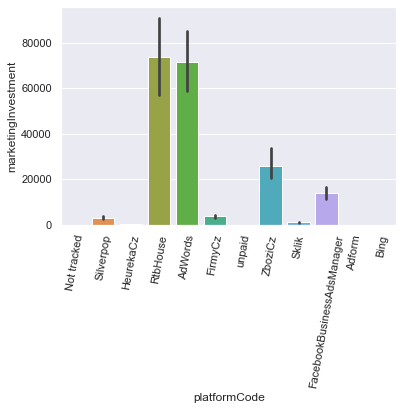

In [28]:
sns.set_theme(palette = 'rocket', style='darkgrid')
sns.barplot(x = 'platformCode', y= 'marketingInvestment' , data = data)
plt.xticks(rotation = 80)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'notset'),
  Text(1, 0, 'emailing'),
  Text(2, 0, 'heureka'),
  Text(3, 0, 'rtbhouse'),
  Text(4, 0, 'adwords_bra'),
  Text(5, 0, 'zbozi'),
  Text(6, 0, 'direct'),
  Text(7, 0, 'organic'),
  Text(8, 0, 'facebook'),
  Text(9, 0, 'internal'),
  Text(10, 0, 'push'),
  Text(11, 0, 'referral'),
  Text(12, 0, 'adwords_sea'),
  Text(13, 0, 'sklik_pla'),
  Text(14, 0, 'adwords_pla'),
  Text(15, 0, 'adwords_dsa'),
  Text(16, 0, 'adwords_rem'),
  Text(17, 0, 'sklik_rem'),
  Text(18, 0, 'sklik_bra'),
  Text(19, 0, 'sklik_sea'),
  Text(20, 0, 'display'),
  Text(21, 0, 'adform_prospecting'),
  Text(22, 0, 'bing'),
  Text(23, 0, 'referralradiobeat')])

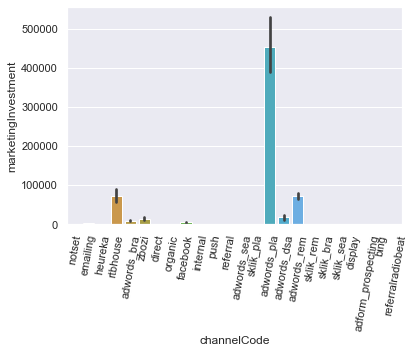

In [29]:
sns.barplot(x = 'channelCode', y= 'marketingInvestment' , data = data)
plt.xticks(rotation = 80)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Not tracked'),
  Text(1, 0, 'Silverpop'),
  Text(2, 0, 'HeurekaCz'),
  Text(3, 0, 'RtbHouse'),
  Text(4, 0, 'AdWords'),
  Text(5, 0, 'FirmyCz'),
  Text(6, 0, 'unpaid'),
  Text(7, 0, 'ZboziCz'),
  Text(8, 0, 'Sklik'),
  Text(9, 0, 'FacebookBusinessAdsManager'),
  Text(10, 0, 'Adform'),
  Text(11, 0, 'Bing')])

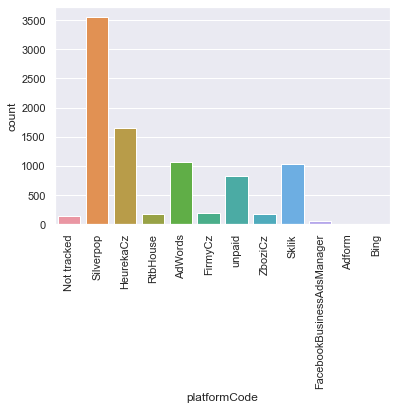

In [30]:
sns.countplot(x='platformCode', data = data)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'notset'),
  Text(1, 0, 'emailing'),
  Text(2, 0, 'heureka'),
  Text(3, 0, 'rtbhouse'),
  Text(4, 0, 'adwords_bra'),
  Text(5, 0, 'zbozi'),
  Text(6, 0, 'direct'),
  Text(7, 0, 'organic'),
  Text(8, 0, 'facebook'),
  Text(9, 0, 'internal'),
  Text(10, 0, 'push'),
  Text(11, 0, 'referral'),
  Text(12, 0, 'adwords_sea'),
  Text(13, 0, 'sklik_pla'),
  Text(14, 0, 'adwords_pla'),
  Text(15, 0, 'adwords_dsa'),
  Text(16, 0, 'adwords_rem'),
  Text(17, 0, 'sklik_rem'),
  Text(18, 0, 'sklik_bra'),
  Text(19, 0, 'sklik_sea'),
  Text(20, 0, 'display'),
  Text(21, 0, 'adform_prospecting'),
  Text(22, 0, 'bing'),
  Text(23, 0, 'referralradiobeat')])

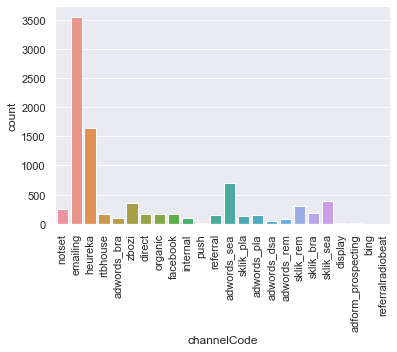

In [31]:
sns.countplot(x='channelCode', data = data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'emailing'),
  Text(1, 0, 'heureka'),
  Text(2, 0, 'adwords_sea'),
  Text(3, 0, 'sklik_sea'),
  Text(4, 0, 'zbozi')])

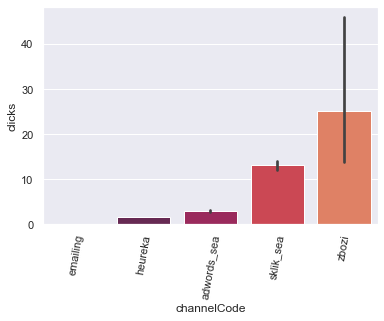

In [33]:
sns.barplot(x = 'channelCode', y= 'clicks' , data = data, order=data.channelCode.value_counts().iloc[:5].index)
plt.xticks(rotation = 80)